In [1]:
import numpy as np
import matplotlib.pyplot as plt

from moosbi import IndependentParameter, ParameterBank, optimize_with_pymoo
from moosbi.examples import BiTarget2DSimulator, make_bitarget2d_example
from moosbi.viz import plot_pareto_scatter, plot_pareto_pairs, plot_param_hist, plot_param_scatter


In [10]:
help(BiTarget2DSimulator)

Help on class BiTarget2DSimulator in module moosbi.examples:

class BiTarget2DSimulator(moosbi.simulator.Simulator)
 |  BiTarget2DSimulator(parameter_bank: 'ParameterBank', objectives: 'Sequence[Callable[[Any, ParameterSet], float]]', constraints: 'Optional[Sequence[Callable[[Any, ParameterSet], float]]]' = None, seeds: 'Optional[Sequence[int]]' = None, summary_fn: 'Optional[Callable[[Any, ParameterSet], np.ndarray]]' = None) -> 'None'
 |
 |  Deterministic 2D bi-target example.
 |
 |  Parameters (in `ParameterSet`):
 |  - x, y: sampled decision variables
 |  - ax, ay: fixed target A coordinates
 |  - bx, by: fixed target B coordinates
 |
 |  Objectives:
 |  - f1 = (x - ax)^2 + (y - ay)^2
 |  - f2 = (x - bx)^2 + (y - by)^2
 |
 |  Method resolution order:
 |      BiTarget2DSimulator
 |      moosbi.simulator.Simulator
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  simulate(self, params: 'ParameterSet', seed: 'Optional[int]' = None) -> 'Any'
 |
 |  ------------

In [2]:
# Targets A and B
A = (0.0, 0.0)
B = (1.0, 0.5)

# ParameterBank: decision vars sampled; targets fixed
bank = ParameterBank(
    parameters={
        "x": IndependentParameter(0.2, is_sampled=True, range=(-1.0, 2.0)),
        "y": IndependentParameter(0.1, is_sampled=True, range=(-1.0, 2.0)),
        "ax": IndependentParameter(A[0]),
        "ay": IndependentParameter(A[1]),
        "bx": IndependentParameter(B[0]),
        "by": IndependentParameter(B[1]),
    },
    theta_sampling=True,
)



In [ ]:
sim = make_bitarget2d_example(bank, seeds=[None]) 

res = optimize_with_pymoo(simulator=sim, pop_size=80, n_gen=80, seed=42, verbose=True)
F = res["F"]
params = res["params"]



n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       80 |      6 |             - |             -
     2 |      160 |     12 |  0.0189791202 |         ideal
     3 |      240 |     18 |  0.2471227841 |         nadir
     4 |      320 |     17 |  0.1020137074 |         nadir
     5 |      400 |     28 |  0.0172619365 |             f
     6 |      480 |     36 |  0.0109581130 |             f
     7 |      560 |     50 |  0.0080985544 |             f
     8 |      640 |     74 |  0.0048252779 |             f
     9 |      720 |     80 |  0.0029385345 |             f
    10 |      800 |     80 |  0.0090729268 |         nadir
    11 |      880 |     80 |  0.0221791212 |         nadir
    12 |      960 |     80 |  0.0407715259 |         nadir
    13 |     1040 |     80 |  0.0159336299 |         nadir
    14 |     1120 |     80 |  0.0015778939 |             f
    15 |     1200 |     80 |  0.0025789867 |             f
    16 |     1280 |     80 |  0.0013253030 |            

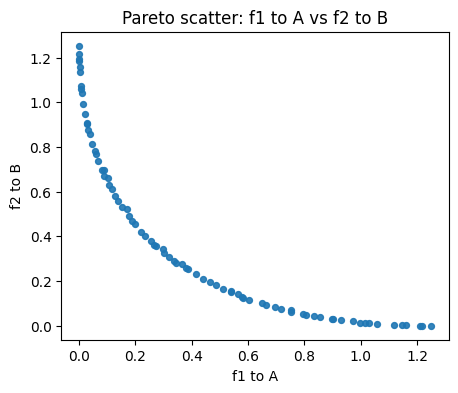

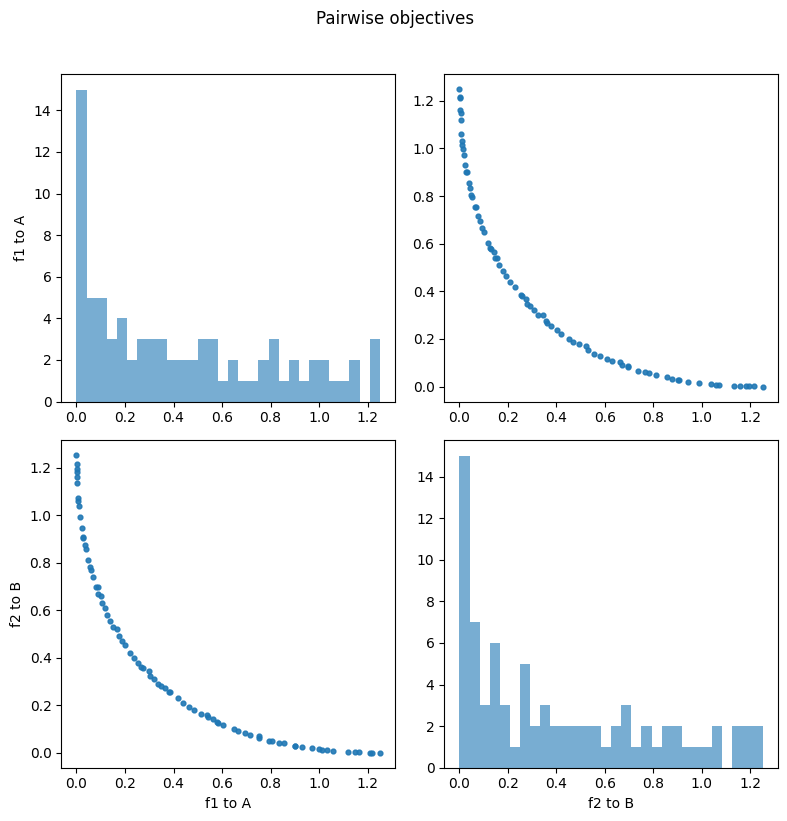

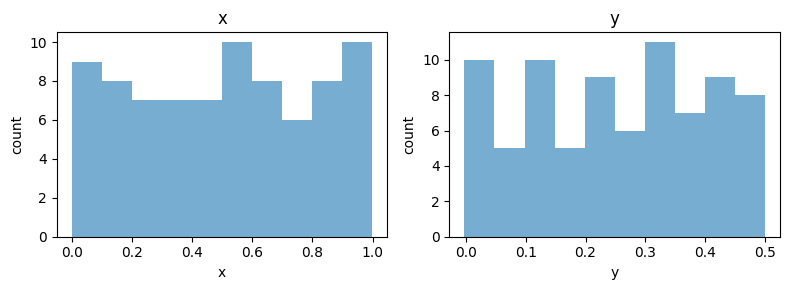

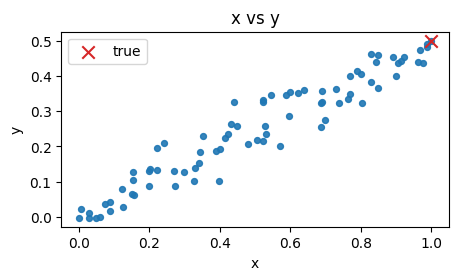

In [11]:
# Pareto in objective space
plot_pareto_scatter(F, 0, 1, labels=["f1 to A", "f2 to B"])
plt.show()

# Pairwise (here just one pair)
plot_pareto_pairs(F, labels=["f1 to A", "f2 to B"])
plt.show()

# Parameter distributions vs truth
plot_param_hist(params, names=["x", "y"], truths=[None, None], bins=10)
plot_param_scatter(params, "x", "y", truths=(B[0], B[1]))  # overlay one target for context
plt.show()